Probability Distributions to Represent Any Continuous Uncertainty

The metalog distributions are an innovative new family of continuous probability distributions that better meet many of today’s needs than conventional distributions from centuries past.  The metalogs can represent a much wider range of shapes than conventional distributions like the normal, lognormal, beta, or triangular. Being quantile-parameterized, metalogs automatically mold themselves to assessed or empirical data, eliminating any need for curve-fitting.  They offer a choice among unbounded, semi-bounded, and bounded forms and have simple, closed-form, easy-to-program equations – making them ideal for decision analysis, simulation, and instant representation of most any assessed or empirical probabilistic data.  

The metalog distributions constitute a new system of continuous univariate probability distributions
designed for flexibility, simplicity, and ease/speed of use in practice.

The metalog is a series expansion of the parameters of the
logistic quantile function.

“metalog” is short for “meta logistic”

Representing/summarizing data with a smooth distribution that adheres to the shape of the data



In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x-> Input parameters of any series. Simply set x equal to a list. 

![title](Y.png)

In [96]:
#Y-matrix
#Y-matrix for the 10-term metalog. 
#The first n columns of this matrix are used to calculate scaling constants (a1, … an) according to a = [YTY]-1YTz.


def y10_z(x,bound,lower_bound,upper_bound):
    #y10 and & z
    
    #Number of cdf  data points in use for input parameters. 
    #Calculated as the number of numeric y input-parameter cells.
    df=pd.DataFrame(x.values,columns=['x'])
    df['y']=(df.index+1-.5)/len(x)

    if bound==0:
        df['z']=df['x']
    if bound==1:
        df['z']=np.log(df['x']-lower_bound)
    if bound==2:
        df['z']=np.log((df['x']-lower_bound)/(upper_bound-df['x']))

    df['y10_0']=1
    df['y10_1']=np.log(df['y']/(1-df['y']))   #np.log(B20/(1-B20))
    df['y10_2']=(df['y']-0.5)*df['y10_1']   #(B20-0.5)*BE79
    df['y10_3']=df['y']-0.5                #B20-0.5
    df['y10_4']=df['y10_3']**2            #BG79^2
    df['y10_5']=df['y10_1']*df['y10_4']   #BE79*BH79
    df['y10_6']=df['y10_3']**3            #BG79^3
    df['y10_7']=df['y10_1']*df['y10_6']   #BE79*BJ79
    df['y10_8']=df['y10_3']**4            #BG79^4
    df['y10_9']=df['y10_1']*df['y10_8']   #BE79*BL79

    
    #matrix inversion
    
    mi1=np.dot(df['z'].values,np.matrix(df[df.columns[3:5]]))*np.linalg.inv(np.matrix(df[df.columns[3:5]]).T*np.matrix(df[df.columns[3:5]]))
    mi2=np.dot(df['z'].values,np.matrix(df[df.columns[3:6]]))*np.linalg.inv(np.matrix(df[df.columns[3:6]]).T*np.matrix(df[df.columns[3:6]]))
    mi3=np.dot(df['z'].values,np.matrix(df[df.columns[3:7]]))*np.linalg.inv(np.matrix(df[df.columns[3:7]]).T*np.matrix(df[df.columns[3:7]]))
    mi4=np.dot(df['z'].values,np.matrix(df[df.columns[3:8]]))*np.linalg.inv(np.matrix(df[df.columns[3:8]]).T*np.matrix(df[df.columns[3:8]]))
    mi5=np.dot(df['z'].values,np.matrix(df[df.columns[3:9]]))*np.linalg.inv(np.matrix(df[df.columns[3:9]]).T*np.matrix(df[df.columns[3:9]]))
    mi6=np.dot(df['z'].values,np.matrix(df[df.columns[3:10]]))*np.linalg.inv(np.matrix(df[df.columns[3:10]]).T*np.matrix(df[df.columns[3:10]]))
    mi7=np.dot(df['z'].values,np.matrix(df[df.columns[3:11]]))*np.linalg.inv(np.matrix(df[df.columns[3:11]]).T*np.matrix(df[df.columns[3:11]]))
    mi8=np.dot(df['z'].values,np.matrix(df[df.columns[3:12]]))*np.linalg.inv(np.matrix(df[df.columns[3:12]]).T*np.matrix(df[df.columns[3:12]]))
    mi9=np.dot(df['z'].values,np.matrix(df[df.columns[3:13]]))*np.linalg.inv(np.matrix(df[df.columns[3:13]]).T*np.matrix(df[df.columns[3:13]]))

    return mi1, mi2, mi3, mi4, mi5, mi6, mi7, mi8, mi9

![title](terms.jpg)

feasibility

CDF is strictly increasing. Equivalently, PDF is positive for 0<y<1

Feasibility of (x ,y ) :
*
invertibility guaranteed
except in pathological cases
Mn(y) is strictly increasing. Equivalently, density function mn(y) is positive over 0<y<1.

In [97]:
#logistic distribution
def term_1_and_2(a1,a2,y):
    return a1 + a2*np.log(y/(1-y))

#skewness term
def term_3(a3,y):
    return a3*(y-0.5)*np.log(y/(1-y))

#kurtosis term
def term_4(a4,y):
    return a4*(y-0.5)

def term_5(a5,y):
    return a5*(y-0.5)**2

def term_6(a6,y):
    return (a6*(y-0.5)**2)*np.log(y/(1-y))

def term_7(a7,y):
    return a7*(y-0.5)**3

def term_8(a8,y):
    return (a8*(y-0.5)**3)*np.log(y/(1-y))

def term_9(a9,y):
    return a9*(y-0.5)**4

def term_10(a10,y):
    return (a10*(y-0.5)**4)*np.log(y/(1-y))

def feas_term_2(a2,y):
    return a2/(y*(1-y))

def feas_term_3(a3,y):
    return a3*((y-0.5)/(y*(1-y)) + np.log(y/(1-y)))

def feas_term_4(a4):
    return a4

def feas_term_5(a5,y):
    return 2*a5*(y-0.5)
           
def feas_term_6(a6,y):
    return a6*((y-0.5)**2 /(y*(1-y)) + 2*(y-0.5)*np.log(y/(1-y)))

def feas_term_7(a7,y):
    return 3*a7*(y-0.5)**2

def feas_term_8(a8,y):
    return a8*((y-0.5)**3/(y*(1-y))  + 3*(y-0.5)**2*np.log(y/(1-y)))

def feas_term_9(a9,y):
    return 4*a9*(y-0.5)**3

def feas_term_10(a10,y):
    return a10*((y-0.5)**4/(y*(1-y)) + 4*(y-0.5)**3*np.log(y/(1-y)))

In [98]:
#ys = Number of cdf  data points in use for input parameters. 
#Calculated as the number of numeric y input-parameter cells.

# x is the series 
def qf(x,ys,bound,lower_bound,upper_bound):

    mi1=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[0]
    mi2=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[1]
    mi3=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[2]
    mi4=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[3]
    mi5=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[4]
    mi6=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[5]
    mi7=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[6]
    mi8=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[7]
    mi9=y10_z(x,bound=bound,lower_bound=lower_bound,upper_bound=upper_bound)[8]

    y=list(range(1,ys))
    qf=pd.DataFrame(y,columns=['y'])
    qf['y']=qf['y']/(ys+1)

    qf['q2'] = term_1_and_2(a1=mi1[0,0],a2=mi1[0,1],y=qf['y'])
        
    qf['q3'] = term_1_and_2(a1=mi2[0,0],a2=mi2[0,1],y=qf['y']) +\
               term_3(a3=mi2[0,2],y=qf['y']) 

    qf['q4'] = term_1_and_2(a1=mi3[0,0],a2=mi3[0,1],y=qf['y']) +\
               term_3(a3=mi3[0,2],y=qf['y'])+\
               term_4(a4=mi3[0,3],y=qf['y'])

    qf['q5'] = term_1_and_2(a1=mi4[0,0],a2=mi4[0,1],y=qf['y']) +\
               term_3(a3=mi4[0,2],y=qf['y'])+\
               term_4(a4=mi4[0,3],y=qf['y'])+\
               term_5(a5=mi4[0,4],y=qf['y'])

    qf['q6'] = term_1_and_2(a1=mi5[0,0],a2=mi5[0,1],y=qf['y']) +\
               term_3(a3=mi5[0,2],y=qf['y']) +\
               term_4(a4=mi5[0,3],y=qf['y']) +\
               term_5(a5=mi5[0,4],y=qf['y']) +\
                term_6(a6=mi5[0,5],y=qf['y'])

    qf['q7'] = term_1_and_2(a1=mi6[0,0],a2=mi6[0,1],y=qf['y']) +\
               term_3(a3=mi6[0,2],y=qf['y']) +\
               term_4(a4=mi6[0,3],y=qf['y']) +\
               term_5(a5=mi6[0,4],y=qf['y']) +\
                term_6(a6=mi6[0,5],y=qf['y']) +\
                term_7(a7=mi6[0,6],y=qf['y'])

    qf['q8']=  term_1_and_2(a1=mi7[0,0],a2=mi7[0,1],y=qf['y']) +\
               term_3(a3=mi7[0,2],y=qf['y']) +\
               term_4(a4=mi7[0,3],y=qf['y']) +\
               term_5(a5=mi7[0,4],y=qf['y']) +\
                term_6(a6=mi7[0,5],y=qf['y']) +\
                term_7(a7=mi7[0,6],y=qf['y']) +\
                term_8(a8=mi7[0,7],y=qf['y'])

    qf['q9']=  term_1_and_2(a1=mi8[0,0],a2=mi8[0,1],y=qf['y']) +\
               term_3(a3=mi8[0,2],y=qf['y']) +\
               term_4(a4=mi8[0,3],y=qf['y']) +\
               term_5(a5=mi8[0,4],y=qf['y']) +\
                term_6(a6=mi8[0,5],y=qf['y']) +\
                term_7(a7=mi8[0,6],y=qf['y']) +\
                term_8(a8=mi8[0,7],y=qf['y']) +\
                term_9(a9=mi8[0,8],y=qf['y'])

    qf['q10']= term_1_and_2(a1=mi9[0,0],a2=mi9[0,1],y=qf['y']) +\
               term_3(a3=mi9[0,2],y=qf['y']) +\
               term_4(a4=mi9[0,3],y=qf['y']) +\
               term_5(a5=mi9[0,4],y=qf['y']) +\
                term_6(a6=mi9[0,5],y=qf['y']) +\
                term_7(a7=mi9[0,6],y=qf['y']) +\
                term_8(a8=mi9[0,7],y=qf['y']) +\
                term_9(a9=mi9[0,8],y=qf['y']) +\
                term_10(a10=mi9[0,9],y=qf['y'])

    qf['f2']= (feas_term_2(a2=mi1[0,1],y=qf['y']))**-1

    qf['f3']= (feas_term_2(a2=mi2[0,1],y=qf['y'])+ \
               feas_term_3(a3=mi2[0,2],y=qf['y']))**-1

    qf['f4']= (feas_term_2(a2=mi3[0,1],y=qf['y'])+\
               feas_term_3(a3=mi3[0,2],y=qf['y'])+\
               feas_term_4(a4=mi3[0,3]))**-1

    qf['f5']= (feas_term_2(a2=mi4[0,1],y=qf['y'])+\
               feas_term_3(a3=mi4[0,2],y=qf['y'])+\
               feas_term_4(a4=mi4[0,3])+\
               feas_term_5(a5=mi4[0,4],y=qf['y']))**-1

    qf['f6']= (feas_term_2(a2=mi5[0,1],y=qf['y'])+\
               feas_term_3(a3=mi5[0,2],y=qf['y'])+\
               feas_term_4(a4=mi5[0,3])+\
               feas_term_5(a5=mi5[0,4],y=qf['y'])+\
               feas_term_6(a6=mi5[0,5],y=qf['y']))**-1

    qf['f7']= (feas_term_2(a2=mi6[0,1],y=qf['y'])+\
               feas_term_3(a3=mi6[0,2],y=qf['y'])+\
               feas_term_4(a4=mi6[0,3])+\
               feas_term_5(a5=mi6[0,4],y=qf['y'])+\
               feas_term_6(a6=mi6[0,5],y=qf['y'])+\
               feas_term_7(a7=mi6[0,6],y=qf['y']))**-1

    qf['f8']= (feas_term_2(a2=mi7[0,1],y=qf['y'])+\
               feas_term_3(a3=mi7[0,2],y=qf['y'])+\
               feas_term_4(a4=mi7[0,3])+\
               feas_term_5(a5=mi7[0,4],y=qf['y'])+\
               feas_term_6(a6=mi7[0,5],y=qf['y'])+\
               feas_term_7(a7=mi7[0,6],y=qf['y'])+\
               feas_term_8(a8=mi7[0,7],y=qf['y']))**-1

    qf['f9']= (feas_term_2(a2=mi8[0,1],y=qf['y'])+\
               feas_term_3(a3=mi8[0,2],y=qf['y'])+\
               feas_term_4(a4=mi8[0,3])+\
               feas_term_5(a5=mi8[0,4],y=qf['y'])+\
               feas_term_6(a6=mi8[0,5],y=qf['y'])+\
               feas_term_7(a7=mi8[0,6],y=qf['y'])+\
               feas_term_8(a8=mi8[0,7],y=qf['y'])+\
               feas_term_9(a9=mi8[0,8],y=qf['y']))**-1

    qf['f10']=(feas_term_2(a2=mi9[0,1],y=qf['y'])+\
               feas_term_3(a3=mi9[0,2],y=qf['y'])+\
               feas_term_4(a4=mi9[0,3])+\
               feas_term_5(a5=mi9[0,4],y=qf['y'])+\
               feas_term_6(a6=mi9[0,5],y=qf['y'])+\
               feas_term_7(a7=mi9[0,6],y=qf['y'])+\
               feas_term_8(a8=mi9[0,7],y=qf['y'])+\
               feas_term_9(a9=mi9[0,8],y=qf['y'])+\
               feas_term_10(a10=mi9[0,9],y=qf['y']))**-1

    min_feas=pd.DataFrame(qf[['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']].min(),columns=['min'])
    min_feas=min_feas.reset_index()
    min_feas=min_feas[min_feas['min']>0]
    max_term=min_feas['index'].max()
    print(max_term)
    
    if bound==0:
        qf['cdf']=qf[max_term.replace('f','q')]
        qf['pdf']=qf[max_term]
    if bound==1:
        qf['cdf']=lower_bound+np.exp(qf[max_term.replace('f','q')])
        qf['pdf']=qf[max_term]*np.exp(-qf[max_term.replace('f','q')])
    if bound==2:
        qf['cdf']=(lower_bound+upper_bound*np.exp(qf[max_term.replace('f','q')]))/(1+np.exp(qf[max_term.replace('f','q')]))       
        qf['pdf']=qf[max_term]*(1+np.exp(qf[max_term.replace('f','q')]))**2/((upper_bound-lower_bound)*np.exp(qf[max_term.replace('f','q')]))
    qf['prob']=qf['pdf']/qf['pdf'].sum()
        
    return qf


f8


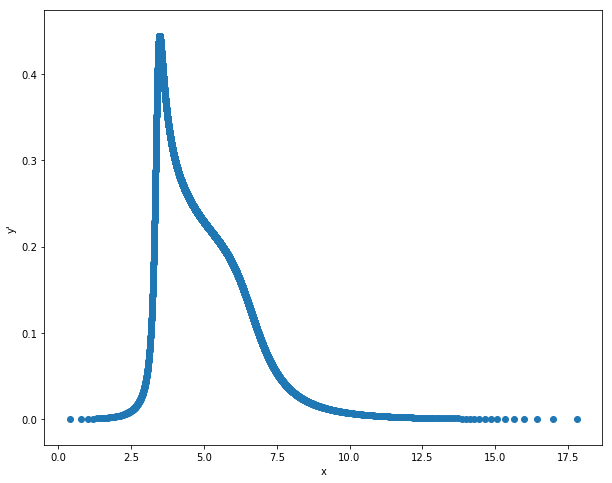

In [116]:
x=[ 2.9485 , 3.1825 , 3.356375 , 3.433575 , 3.53175 , 3.583 , 3.601 , 3.655 , 3.7495 , 3.7865 , 3.91 , 3.92025 ,
    3.93375 , 4.0415 , 4.15825 , 4.36075 , 4.50775 , 4.52125 , 4.63175 , 4.73475 ,
    4.75525 , 4.88925 , 5.0425 , 5.20675 , 5.29325 , 5.3785 , 5.44825 , 5.54625 ,
    5.69975 , 5.77575 , 5.99025 , 6.11 , 6.15125 , 6.44025 , 6.8315 ,
    7.02675 , 7.2295, 7.32 , 8.27675 , 9.969,]

x=pd.DataFrame(x,columns=['x'])

#  u = unbounded -> 0
#  s = semibounded -> 1 
#  b = bounded -> 2

df=qf(x=x['x'].sort_values(), ys=9999, bound=0, lower_bound=2, upper_bound=12)
plt.figure(figsize=(10,8))
plt.scatter(df['cdf'].values,df['pdf'].values,)
plt.xlabel('x')
plt.ylabel("y'")
plt.show()

In [100]:
df.columns

Index(['y', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'f2', 'f3',
       'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'cdf', 'pdf', 'prob'],
      dtype='object')

In [101]:
df[['cdf','pdf']]

,cdf,pdf
0,2.929537,0.151120
1,3.021090,0.100030
2,3.117607,0.109586
3,3.202270,0.128224
4,3.273850,0.152853
5,3.333698,0.183214
6,3.383624,0.219454
7,3.425396,0.261492
8,3.460603,0.308614
9,3.490629,0.359122


In [93]:
df[['f2', 'f3','f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']]

,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,0.063267,0.078977,0.174724,0.256222,0.107983,0.115021,0.097526,0.442710,0.828883
1,0.125256,0.157880,0.327118,0.446649,0.241784,0.248550,0.222381,0.302199,0.309330
2,0.185966,0.236048,0.458806,0.588678,0.392877,0.393850,0.370698,0.341646,0.333725
3,0.245399,0.313093,0.572504,0.696834,0.552606,0.544483,0.536646,0.410609,0.397471
4,0.303553,0.388730,0.670831,0.781044,0.711965,0.693960,0.711724,0.500417,0.485261
5,0.360429,0.462739,0.756084,0.847984,0.862714,0.836293,0.885672,0.610781,0.596087
6,0.416027,0.534937,0.830218,0.902197,0.998445,0.966595,1.048210,0.742551,0.731087
7,0.470347,0.605177,0.894872,0.946837,1.115156,1.081465,1.190911,0.895715,0.890772
8,0.523389,0.673336,0.951411,0.984142,1.211234,1.179088,1.308478,1.067989,1.073186
9,0.575153,0.739317,1.000978,1.015729,1.287019,1.259082,1.399053,1.253561,1.272192


In [94]:
df[['q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', ]]

,q2,q3,q4,q5,q6,q7,q8,q9,q10
0,0.859596,0.961934,1.072974,1.093810,1.059687,1.061452,1.053997,1.074844,1.077070
1,0.969648,1.049692,1.113820,1.122593,1.120585,1.119574,1.120951,1.105618,1.103772
2,1.034701,1.101125,1.139404,1.141907,1.152829,1.151328,1.155614,1.137066,1.135400
3,1.081339,1.137773,1.158823,1.157445,1.174203,1.172837,1.177965,1.163860,1.162989
4,1.117895,1.166371,1.174912,1.170962,1.190093,1.189056,1.194101,1.185967,1.185820
5,1.148080,1.189911,1.188925,1.183227,1.202817,1.202149,1.206663,1.204082,1.204448
6,1.173875,1.209986,1.201529,1.194647,1.213565,1.213248,1.217015,1.218947,1.219617
7,1.196462,1.227545,1.213118,1.205457,1.223022,1.223010,1.225944,1.231217,1.232020
8,1.216603,1.243199,1.223947,1.215810,1.231611,1.231851,1.233938,1.241443,1.242251
9,1.234819,1.257363,1.234187,1.225807,1.239609,1.240048,1.241315,1.250082,1.250806


In [ ]:
train=pd.read_csv('train.csv')

x=[ 2.9485 , 3.1825 , 3.356375 , 3.433575 , 3.53175 , 3.583 , 3.601 , 3.655 , 3.7495 , 3.7865 , 3.91 , 3.92025 ,
    3.93375 , 4.0415 , 4.15825 , 4.36075 , 4.50775 , 4.52125 , 4.63175 , 4.73475 ,
    4.75525 , 4.88925 , 5.0425 , 5.20675 , 5.29325 , 5.3785 , 5.44825 , 5.54625 ,
    5.69975 , 5.77575 , 5.99025 , 6.11 , 6.15125 , 6.44025 , 6.8315 ,
    7.02675 , 7.2295, 7.32 , 8.27675 , 9.969,]

df=pd.DataFrame()

for t in train.columns[2:]:
    df=qf(x=train[t].sort_values(),ys=99)
    
    plt.figure(figsize=(10,8))
    plt.scatter(df['cdf'].values,df['pdf'].values,)
    plt.xlabel('x')
    plt.ylabel("y'")
    plt.show()
    for i in range(0,21):
        print(np.random.choice(df['cdf'], 1, p=df['prob']))

In [27]:
    #Number of cdf  data points in use for input parameters. 
    #Calculated as the number of numeric y input-parameter cells.
    bound=2
    lower_bound=0
    upper_bound=15
    df=pd.DataFrame(x.values,columns=['x'])
    df['y']=(df.index+1-.5)/len(x)

    if bound==0:
        df['z']=df['x']
    if bound==1:
        df['z']=df['x']
    if bound==2:
        df['z']=np.log((df['x']-lower_bound)/(upper_bound-df['x']))   

    df['y10_0']=1
    df['y10_1']=np.log(df['y']/(1-df['y']))   #np.log(B20/(1-B20))
    df['y10_2']=(df['y']-0.5)*df['y10_1']   #(B20-0.5)*BE79
    df['y10_3']=df['y']-0.5                #B20-0.5
    df['y10_4']=df['y10_3']**2            #BG79^2
    df['y10_5']=df['y10_1']*df['y10_4']   #BE79*BH79
    df['y10_6']=df['y10_3']**3            #BG79^3
    df['y10_7']=df['y10_1']*df['y10_6']   #BE79*BJ79
    df['y10_8']=df['y10_3']**4            #BG79^4
    df['y10_9']=df['y10_1']*df['y10_8']   #BE79*BL79

    #matrix inversion
    mi1=np.dot(df['z'].values,np.matrix(df[df.columns[3:5]]))*np.linalg.inv(np.matrix(df[df.columns[3:5]]).T*np.matrix(df[df.columns[3:5]]))
    mi2=np.dot(df['z'].values,np.matrix(df[df.columns[3:6]]))*np.linalg.inv(np.matrix(df[df.columns[3:6]]).T*np.matrix(df[df.columns[3:6]]))
    mi3=np.dot(df['z'].values,np.matrix(df[df.columns[3:7]]))*np.linalg.inv(np.matrix(df[df.columns[3:7]]).T*np.matrix(df[df.columns[3:7]]))
    mi4=np.dot(df['z'].values,np.matrix(df[df.columns[3:8]]))*np.linalg.inv(np.matrix(df[df.columns[3:8]]).T*np.matrix(df[df.columns[3:8]]))
    mi5=np.dot(df['z'].values,np.matrix(df[df.columns[3:9]]))*np.linalg.inv(np.matrix(df[df.columns[3:9]]).T*np.matrix(df[df.columns[3:9]]))
    mi6=np.dot(df['z'].values,np.matrix(df[df.columns[3:10]]))*np.linalg.inv(np.matrix(df[df.columns[3:10]]).T*np.matrix(df[df.columns[3:10]]))
    mi7=np.dot(df['z'].values,np.matrix(df[df.columns[3:11]]))*np.linalg.inv(np.matrix(df[df.columns[3:11]]).T*np.matrix(df[df.columns[3:11]]))
    mi8=np.dot(df['z'].values,np.matrix(df[df.columns[3:12]]))*np.linalg.inv(np.matrix(df[df.columns[3:12]]).T*np.matrix(df[df.columns[3:12]]))
    mi9=np.dot(df['z'].values,np.matrix(df[df.columns[3:13]]))*np.linalg.inv(np.matrix(df[df.columns[3:13]]).T*np.matrix(df[df.columns[3:13]]))


In [28]:
mi2

matrix([[-0.78822095,  0.24711106,  0.16822972]])

In [149]:
df['z_bound']

0    -1.407893
1    -1.311914
2    -1.243897
3    -1.214505
4    -1.177789
5    -1.158903
6    -1.152314
7    -1.132681
8    -1.098790
9    -1.085676
10   -1.042506
11   -1.038964
12   -1.034307
13   -0.997500
14   -0.958310
15   -0.891906
16   -0.844839
17   -0.840561
18   -0.805813
19   -0.773835
20   -0.767516
21   -0.726560
22   -0.680424
23   -0.631738
24   -0.606389
25   -0.581591
26   -0.561430
27   -0.533289
28   -0.489619
29   -0.468168
30   -0.408174
31   -0.375000
32   -0.363621
33   -0.284504
34   -0.178741
35   -0.126368
36   -0.072165
37   -0.048009
38    0.207879
39    0.683862
Name: z_bound, dtype: float64

In [1]:
mi5[0,2]

NameError: name 'mi5' is not defined